<a href="https://colab.research.google.com/github/RijuKim/data_analysis/blob/main/social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis with Twitter

### 드라이브에 마운트

In [1]:
from google.colab import drive
drive.mount('/gdrive') 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# 확인 이후
plt.rc('font', family='NanumGothic')

import matplotlib.font_manager as fm
fm._rebuild

['DejaVu Serif Display', 'STIXSizeFourSym', 'cmsy10', 'STIXGeneral', 'cmex10', 'DejaVu Sans Mono', 'cmmi10', 'cmb10', 'DejaVu Serif', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'cmr10', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Serif', 'STIXSizeFiveSym', 'DejaVu Sans Display', 'STIXNonUnicode', 'cmss10', 'STIXNonUnicode', 'cmtt10', 'STIXNonUnicode', 'STIXSizeTwoSym', 'Liberation Sans Narrow', 'NanumSquare', 'NanumSquareRound', 'NanumMyeongjo', 'Liberation Sans', 'Liberation Sans', 'Liberation Mono', 'NanumGothic Eco', 'NanumBarunpen', 'NanumGothic', 'NanumSquare', 'NanumGothicCoding', 'Liberation Serif', 'NanumSquareRound', 'Liberation Sans Narrow', 'NanumMyeongjo', 'Nanum Pen Script', 'Liberation Serif', 'NanumGothic', 'NanumBarunGothic',

<function matplotlib.font_manager._rebuild()>

### 트위터 개발자 계정 연결하기

In [3]:
!pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-8cse01m6
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-8cse01m6
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py) ... done


In [4]:
import tweepy  #트위터 데이터 스크래핑 라이브러리 

In [5]:
# 트위터 앱의 Keys and Access Tokens 탭 참조 (자신의 설정 값을 넣어준다)

api_key = 'MJDOgNY6Vj5uFBdzQTfm5kAnC'

api_secret_key = 'lt9P0VuGvUSBeFxxgDrp2gH3yBM7UhaqxYBCT5PWSWHMKrYiGy'

In [6]:
# 1. 인증요청(1차) : 개인 앱 정보 
auth = tweepy.OAuthHandler(api_key, api_secret_key)

access_token = '1219926933762265088-7zvp4nezEUVvUInZ2LrzhLFFwKFoiW'

access_token_secret = 'Xk1XawjtA8GALXl7inXbullywaLO8zhqef6Yh2onldGqc'

In [7]:
# 2. access 토큰 요청(2차) - 인증요청 참조변수 이용
auth.set_access_token(access_token, access_token_secret)

In [8]:
# 3. twitter API 생성  
api = tweepy.API(auth)

In [9]:
keyword = "약 먹기"       # 자신이 검색하고 싶은 키워드 입력
until = "2023-01-12"      # 특정 일자 이전의 tweet만 검색. 날짜는 ‘YYYY-MM-DD’형태로 입력
items = 100               # 몇 개의 트윗을 검색할 것인지 입력


search = []             # Scraping 결과 저장할 리스트   
for status in tweepy.Cursor(api.search_tweets, q=keyword, until=until).items(items):
    search.append(status.text)

print(len(search)) # 결과물 길이 
print(search[0]) # 첫번째 text 보기 

100
어제 충동을 못참고 밤 11시에 떡볶이 튀김범벅에 오뎅4개 먹고 잤더니 약먹기 전 혈당이 229임ㅋㅋㅋ...... 반성합니다ㅠ https://t.co/6SWoJZeQV8


In [10]:
data = {}   # 전체 결과물 추가
i = 0       # 트윗 번호
for tweet in search:
    data['text'] = search[i]   # text키에 text문서 저장
    #print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

print(data)

{'text': '내일 할 일\n-패스 사야될거 개수 정하기\n-공항 버스 표 미리 구매하기\n-노선 좀 짜기\n-약 먹기'}


In [11]:
# 전체 트윗을 tweet_data 텍스트 파일로 저장

import os

wfile = open("/gdrive/My Drive/tweet_data_약먹기.txt", mode='w')   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

for tweet in search:
    data['text'] = search[i]
    wfile.write(search[i]+'\n')  # 파일 출력
    i += 1

wfile.close()

In [12]:
# 파일에 scraping 해온 데이터가 잘 저장되었나 확인

file = open("/gdrive/My Drive/tweet_data_약먹기.txt", 'r')

uncleaned_text = file.readlines()
file.close()

print(uncleaned_text)

# 파일에 scraping 해온 데이터가 잘 저장되었나 확인

['어제 충동을 못참고 밤 11시에 떡볶이 튀김범벅에 오뎅4개 먹고 잤더니 약먹기 전 혈당이 229임ㅋㅋㅋ...... 반성합니다ㅠ https://t.co/6SWoJZeQV8\n', '스틱약 진.짜 개맛없음 액체라서 더맛없음 진심\n', '너무먹기싫어 근데기침가래약이라 안먹으면 내가죽어감 개짱남 ㅡㅡ 그냥 목구멍에직빵으로 꽂혓음 좋겟다 입에안닿고..\n', '@liiipumu 병원갈때 같이 얘기해 진료과목 달라도 그정돈 알아서 처방 해줄걸 약 먹기 애매하면 거기서 말해줄거고\n', '@algkdl9999 일단 집에 있는 약 먹기는 했는데 안 나아지면 이따 가보려구 고마어 \U0001f979💕\n', 'RT @__jwl_: "약 먹는 거 많이 힘드냐?"\n', '\n', '"너 옛날부터 약 먹기 싫다고 의사랑 간호사들 엄청 힘들게 했었어."\n', '\n', '"그걸..기억해?"\n', '\n', '"그 약 먹을 때 옆에서 주문 외워주던게 난데? 비비디바비디부."\n', '\n', '#이재욱 https://t.co/x…\n', 'RT @__jwl_: "뭘 그렇게 놀래. 내가 오고 싶을 때 올 수도 있는거지."\n', '\n', '"빨리 나와, 학교 같이가게."\n', '\n', '"아빠랑 약 잘 먹기로 약속했거든."\n', '\n', '"비비디바비디부?"\n', '\n', '"그걸.. 아직도 기억해?"\n', '\n', '"이 때랑 똑같네. 그 주문이 아직도 통…\n', '@kiwise10 신경성이라서 그런가?? 맨날 약 먹기도 뭐하고 곤란하네 ㄱㅡ..... 으잉\n', '콘서타가 본체인지 내 뇌새까가 본체인지 씨발 약먹기 전후 차이 이래나도 되나? 현타 ㄹㅈㄷ\n', '어제 오후에 고구마 물 마신 이후에 토한게 마지막이긴 한데 그 이후로 제대로 된 식사를 한 적이 없고, 새벽에 약 먹고도 불편한지 한참 깊은 잠을 못들고 쩝쩝거렸음… 지금은 밥 먹더니 안쩝쩝거리고 잔다. 닷새 더 약먹기 화이팅…\n', '@eun032446951 오우, 내 몸이면 넌 진짜.. 진즉

## 전처리, 그래프, 시각화에 필요한 라이브러리 import

In [13]:
import re #이모티콘 전처리
import networkx as nx #네트워크 분석 라이브러리

#matplotlib.font_manager._rebuild()
#plt.rc('font', family='NanumGothic')


### 파이썬 정규표현식을 이용해서 데이터 전처리

In [14]:
# 파이썬 정규표현식을 이용해서 데이터 전처리 (분석에 필요 없는 부분 삭제)

def clean_data(readData):
    text = re.sub('\n', '', readData)
    text = re.sub('RT', '', text) 
    text = re.sub('h\w{4}://\w\W.{13}', '', text)
    text = re.sub('&amp;', '', text)
    text = re.sub('@\w{2,15}', '', text)
    text = re.sub('^https', '', text)
    text = re.sub("[_《》….()!,'?&;*“”‘’=+-/#%]",'', text)
    text = re.sub('"','', text)
    text = re.sub('[0-9:]', '', text)
    
    text = text.lower() # 영어라서 소문자로 바꿔준다
    
    return text


In [15]:
# clean_data 함수 호출 전후 데이터 확인
print("전처리 이전 데이터 : ")
print(uncleaned_text[0])

print("전처리 이후 데이터 : ")
print(clean_data(uncleaned_text[0]))

# 데이터가 잘 정제 되었는지 확인해보자

전처리 이전 데이터 : 
어제 충동을 못참고 밤 11시에 떡볶이 튀김범벅에 오뎅4개 먹고 잤더니 약먹기 전 혈당이 229임ㅋㅋㅋ...... 반성합니다ㅠ https://t.co/6SWoJZeQV8

전처리 이후 데이터 : 
어제 충동을 못참고 밤 시에 떡볶이 튀김범벅에 오뎅개 먹고 잤더니 약먹기 전 혈당이 임ㅋㅋㅋ 반성합니다ㅠ 


#### 만약 트윗에 이모티콘이 있다면?

In [16]:
# 이모티콘을 제거하는 패턴 만들기
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# 이모티콘을 제거하는 함수 만들기
def remove_emoji(readData):
    text = re.sub(emoji_pattern, '', readData)
    return text


In [17]:
# remove_emoji 함수 호출 전후 데이터 확인

print("이모지 제거 이전 데이터 : ")
print(uncleaned_text[3])

print("이모지 제거 이후 데이터 : ")
print(uncleaned_text[3])

#데이터가 잘 정제 되었는지 확인해보자

이모지 제거 이전 데이터 : 
@liiipumu 병원갈때 같이 얘기해 진료과목 달라도 그정돈 알아서 처방 해줄걸 약 먹기 애매하면 거기서 말해줄거고

이모지 제거 이후 데이터 : 
@liiipumu 병원갈때 같이 얘기해 진료과목 달라도 그정돈 알아서 처방 해줄걸 약 먹기 애매하면 거기서 말해줄거고



### 반복문을 돌며 데이터 정제 함수 호출

In [18]:
cleaned_text = []

for i in range(len(uncleaned_text)):
  first_cleaned_text = clean_data(uncleaned_text[i])
  second_cleaned_text = remove_emoji(first_cleaned_text)
  
  # 한 트윗씩 거치며 새로운 리스트에 담는다.
  cleaned_text.append(second_cleaned_text)
  


print(cleaned_text)

['어제 충동을 못참고 밤 시에 떡볶이 튀김범벅에 오뎅개 먹고 잤더니 약먹기 전 혈당이 임ㅋㅋㅋ 반성합니다ㅠ ', '스틱약 진짜 개맛없음 액체라서 더맛없음 진심', '너무먹기싫어 근데기침가래약이라 안먹으면 내가죽어감 개짱남 ㅡㅡ 그냥 목구멍에직빵으로 꽂혓음 좋겟다 입에안닿고', ' 병원갈때 같이 얘기해 진료과목 달라도 그정돈 알아서 처방 해줄걸 약 먹기 애매하면 거기서 말해줄거고', ' 일단 집에 있는 약 먹기는 했는데 안 나아지면 이따 가보려구 고마어 \U0001f979', '  약 먹는 거 많이 힘드냐', '', '너 옛날부터 약 먹기 싫다고 의사랑 간호사들 엄청 힘들게 했었어', '', '그걸기억해', '', '그 약 먹을 때 옆에서 주문 외워주던게 난데 비비디바비디부', '', '이재욱 httpstcox', '  뭘 그렇게 놀래 내가 오고 싶을 때 올 수도 있는거지', '', '빨리 나와 학교 같이가게', '', '아빠랑 약 잘 먹기로 약속했거든', '', '비비디바비디부', '', '그걸 아직도 기억해', '', '이 때랑 똑같네 그 주문이 아직도 통', ' 신경성이라서 그런가 맨날 약 먹기도 뭐하고 곤란하네 ㄱㅡ 으잉', '콘서타가 본체인지 내 뇌새까가 본체인지 씨발 약먹기 전후 차이 이래나도 되나 현타 ㄹㅈㄷ', '어제 오후에 고구마 물 마신 이후에 토한게 마지막이긴 한데 그 이후로 제대로 된 식사를 한 적이 없고 새벽에 약 먹고도 불편한지 한참 깊은 잠을 못들고 쩝쩝거렸음 지금은 밥 먹더니 안쩝쩝거리고 잔다 닷새 더 약먹기 화이팅', ' 오우 내 몸이면 넌 진짜 진즉 약 먹기도 전에 죽었을거 같은데', ' 허 귀여워 아저씨라고 부를 땐 반응 잘 안해줘도 싸부 에는 반응해주는 것 같으니까 더 싸부라고 부를듯 손 베인 날에 약바르고 꾸깃꾸깃 치료할 거 생각하니 귀엽네요 하 칼쥐는 법 ', '약먹으면 너무 일찍자버리고 약 안먹으면 밤새고ㅠ', '진짜 먹기 싫ㅇ ', '월 일 할 일', '☑️ 밀린 연락 답장', '☑️ 병원 꼭 약 무조건', '☑️ 빨

### 토큰화를 위한 라이브러리 설치

In [19]:
# 영어 단어 토큰화 하기 위한 라이브러리
import nltk                     # natural language toolkit
nltk.download('all')

# 시간 1분~2분 정도 소요. 다 되면 True라고 뜬다.

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag # 품사판별
from nltk.corpus import stopwords

* 영어 문장에 대해서 토큰화를 수행하고, 이어서 품사 태깅을 수행
* PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NN은 명사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

In [21]:
print(word_tokenize(cleaned_text[0]))

# 토큰화되었는지 확인

['어제', '충동을', '못참고', '밤', '시에', '떡볶이', '튀김범벅에', '오뎅개', '먹고', '잤더니', '약먹기', '전', '혈당이', '임ㅋㅋㅋ', '반성합니다ㅠ']


In [22]:
all_nouns = []

for t in range(len(cleaned_text)): # 전체 트윗 개수만큼 반복
  x = word_tokenize(cleaned_text[t]) # 토큰화
  words = pos_tag(x) # 품사 태깅
  nouns = ""
  for word, pos in words:
    if pos in ['NN', 'NNP', 'NNS']: # 명사, 고유명사, 명사의 복수형 단어만 남긴다.
      param = word      
      nouns = nouns + param + " "
  all_nouns.append(nouns)

print(all_nouns)

['충동을 못참고 밤 시에 떡볶이 튀김범벅에 오뎅개 먹고 잤더니 약먹기 전 혈당이 임ㅋㅋㅋ 반성합니다ㅠ ', '진짜 개맛없음 액체라서 더맛없음 진심 ', '근데기침가래약이라 안먹으면 내가죽어감 개짱남 ㅡㅡ 그냥 목구멍에직빵으로 꽂혓음 좋겟다 입에안닿고 ', '같이 얘기해 진료과목 달라도 그정돈 알아서 처방 해줄걸 약 먹기 애매하면 거기서 말해줄거고 ', '집에 있는 약 먹기는 했는데 안 나아지면 이따 가보려구 고마어 \U0001f979 ', '먹는 거 많이 힘드냐 ', '', '옛날부터 약 먹기 싫다고 의사랑 간호사들 엄청 힘들게 했었어 ', '', '그걸기억해 ', '', '약 먹을 때 옆에서 주문 외워주던게 난데 비비디바비디부 ', '', '이재욱 httpstcox ', '그렇게 놀래 내가 오고 싶을 때 올 수도 있는거지 ', '', '나와 학교 같이가게 ', '', '약 잘 먹기로 약속했거든 ', '', '비비디바비디부 ', '', '아직도 기억해 ', '', '때랑 똑같네 그 주문이 아직도 통 ', '그런가 맨날 약 먹기도 뭐하고 곤란하네 ㄱㅡ 으잉 ', '본체인지 내 뇌새까가 본체인지 씨발 약먹기 전후 차이 이래나도 되나 현타 ㄹㅈㄷ ', '오후에 고구마 물 마신 이후에 토한게 마지막이긴 한데 그 이후로 제대로 된 식사를 한 적이 없고 새벽에 약 먹고도 불편한지 한참 깊은 잠을 못들고 쩝쩝거렸음 지금은 밥 먹더니 안쩝쩝거리고 잔다 닷새 더 약먹기 화이팅 ', '내 몸이면 넌 진짜 진즉 약 먹기도 전에 죽었을거 같은데 ', '귀여워 아저씨라고 부를 땐 반응 잘 안해줘도 싸부 에는 반응해주는 것 같으니까 더 싸부라고 부를듯 손 베인 날에 약바르고 꾸깃꾸깃 치료할 거 생각하니 귀엽네요 하 칼쥐는 법 ', '너무 일찍자버리고 약 안먹으면 밤새고ㅠ ', '먹기 싫ㅇ ', '일 할 일 ', '밀린 연락 답장 ', '병원 꼭 약 무조건 ', '☑️ 빨래 ', '죽요거트초콜릿 다 먹기 ', '과제 내용 구상 ', '약 먹기 시작한게 다행인게 회피성 스트레스때문에 급

In [23]:
# 한 트윗 안에 중복 단어가 있는지 점검

file = open('dummy.txt', 'w')
for article in all_nouns:
  article = list(set(article.split())) # 단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
  print(article)
  for i in range(len(article)):
    file.write(article[i]+' ')
  file.write('\n')
file.close()
  

['밤', '임ㅋㅋㅋ', '충동을', '잤더니', '오뎅개', '튀김범벅에', '약먹기', '시에', '혈당이', '먹고', '반성합니다ㅠ', '못참고', '떡볶이', '전']
['진짜', '개맛없음', '진심', '액체라서', '더맛없음']
['그냥', '입에안닿고', '목구멍에직빵으로', '좋겟다', 'ㅡㅡ', '근데기침가래약이라', '안먹으면', '내가죽어감', '꽂혓음', '개짱남']
['진료과목', '달라도', '애매하면', '그정돈', '같이', '알아서', '해줄걸', '약', '얘기해', '거기서', '먹기', '처방', '말해줄거고']
['했는데', '있는', '안', '나아지면', '가보려구', '집에', '약', '고마어', '이따', '\U0001f979', '먹기는']
['힘드냐', '거', '많이', '먹는']
[]
['간호사들', '싫다고', '힘들게', '했었어', '약', '옛날부터', '엄청', '먹기', '의사랑']
[]
['그걸기억해']
[]
['옆에서', '주문', '외워주던게', '약', '비비디바비디부', '먹을', '때', '난데']
[]
['이재욱', 'httpstcox']
['그렇게', '올', '싶을', '내가', '놀래', '오고', '때', '수도', '있는거지']
[]
['같이가게', '학교', '나와']
[]
['먹기로', '약속했거든', '잘', '약']
[]
['비비디바비디부']
[]
['아직도', '기억해']
[]
['똑같네', '아직도', '주문이', '통', '그', '때랑']
['그런가', '뭐하고', '먹기도', '곤란하네', '약', '맨날', '으잉', 'ㄱㅡ']
['씨발', '현타', '약먹기', 'ㄹㅈㄷ', '이래나도', '되나', '뇌새까가', '차이', '본체인지', '전후', '내']
['쩝쩝거렸음', '잠을', '지금은', '먹더니', '잔다', '고구마', '없고', '약', '식사를', '새벽에', '토한게', '약먹기', '한참', '이후에', '안쩝쩝거리고', '화이팅',

#### 단어의 동시 출현 빈도 count

In [24]:
count = {}   # 동시출현 빈도가 저장될 딕셔너리

for article in open('dummy.txt'):
  article = list(set(article.split())) # 단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
  for i, a in enumerate(article): # 인덱스와 원소를 동시에 접근하면서 반복문 돌기
    for b in article[i:]:
      if a==b: 
        # 같은 단어의 경우는 세지 않으므로 그냥 지나간다
        # 여기에 작성
        continue
      if a>b: 
        a,b = b,a         # A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
        count[a, b] = count.get((a,b),0)+1   # 실제로 센다
        b,a = a,b
      elif a<b:
        count[a, b] = count.get((a,b),0)+1   # 실제로 센다
print(count)

{('밤', '임ㅋㅋㅋ'): 1, ('밤', '충동을'): 1, ('밤', '잤더니'): 1, ('밤', '오뎅개'): 1, ('밤', '튀김범벅에'): 1, ('밤', '약먹기'): 1, ('밤', '시에'): 1, ('밤', '혈당이'): 1, ('먹고', '밤'): 1, ('반성합니다ㅠ', '밤'): 1, ('못참고', '밤'): 1, ('떡볶이', '밤'): 1, ('밤', '전'): 1, ('임ㅋㅋㅋ', '충동을'): 1, ('임ㅋㅋㅋ', '잤더니'): 1, ('오뎅개', '임ㅋㅋㅋ'): 1, ('임ㅋㅋㅋ', '튀김범벅에'): 1, ('약먹기', '임ㅋㅋㅋ'): 1, ('시에', '임ㅋㅋㅋ'): 1, ('임ㅋㅋㅋ', '혈당이'): 1, ('먹고', '임ㅋㅋㅋ'): 1, ('반성합니다ㅠ', '임ㅋㅋㅋ'): 1, ('못참고', '임ㅋㅋㅋ'): 1, ('떡볶이', '임ㅋㅋㅋ'): 1, ('임ㅋㅋㅋ', '전'): 1, ('잤더니', '충동을'): 1, ('오뎅개', '충동을'): 1, ('충동을', '튀김범벅에'): 1, ('약먹기', '충동을'): 1, ('시에', '충동을'): 1, ('충동을', '혈당이'): 1, ('먹고', '충동을'): 1, ('반성합니다ㅠ', '충동을'): 1, ('못참고', '충동을'): 1, ('떡볶이', '충동을'): 1, ('전', '충동을'): 1, ('오뎅개', '잤더니'): 1, ('잤더니', '튀김범벅에'): 1, ('약먹기', '잤더니'): 1, ('시에', '잤더니'): 1, ('잤더니', '혈당이'): 1, ('먹고', '잤더니'): 1, ('반성합니다ㅠ', '잤더니'): 1, ('못참고', '잤더니'): 1, ('떡볶이', '잤더니'): 1, ('잤더니', '전'): 1, ('오뎅개', '튀김범벅에'): 1, ('약먹기', '오뎅개'): 1, ('시에', '오뎅개'): 1, ('오뎅개', '혈당이'): 1, ('먹고', '오뎅개'): 1, ('반성합니다ㅠ', '오뎅개'): 1, ('못참고', '오뎅개'): 1

In [25]:
# 엣지 리스트를 그리기 위한 사전 작업

min_num = 3   # 동시 출현 빈도 카운팅 현황을 보고 알맞게 조정할 변수

file = open('edge_list.txt', 'w')
for key, value in count.items():
  if value >= min_num :
    print(key, value)
    string = str(key).strip("()")
    string = string.replace("'", "")
    string = string.replace(",","")
    newstr = string + "\n"
    file.write(newstr)
file.close()

# 직접 파일을 열어 비교해보자

('먹기', '약') 17
('약', '잘') 8
('밥', '약') 5
('약', '전에') 3
('거', '잘') 3
('꼭', '약') 4
('다', '먹기') 3
('많이', '약') 3
('먹기', '잘') 5
('먹기', '밥') 3
('먹고', '약') 7
('먹고', '먹기') 3
('잘', '챙겨먹기') 4
('유지하기', '확실한') 3
('가장', '확실한') 3
('기분', '확실한') 3
('방법은', '확실한') 3
('가장', '유지하기') 3
('기분', '유지하기') 3
('방법은', '유지하기') 3
('가장', '기분') 3
('가장', '방법은') 3
('기분', '방법은') 3
('먹기', '정신과약') 3
('꾸준히', '정신과약') 3
('꾸준히', '먹기') 3
('성취하기', '자잘하게라도') 3
('잘', '종합비타민') 3
('종합비타민', '챙겨먹기') 3
('라고', '생각함') 3
('먹기', '약을') 3
('식품', '주는') 3
('식품', '혈압') 3
('낮추는', '식품') 3
('식품', '없고') 3
('식품', '평생') 3
('식품', '영양') 3
('네이버에서', '식품') 3
('식품', '있을겁니다') 3
('식품', '주문하고') 3
('보며', '식품') 3
('검색을', '식품') 3
('식품', '영상을') 3
('뒷광고', '식품') 3
('식품', '영양제를') 3
('식품', '싫지만') 3
('식품', '유투브로') 3
('식품', '약은') 3
('병원에서', '식품') 3
('물론', '식품') 3
('몸에', '식품') 3
('식품', '영양제는') 3
('식품', '아무해가') 3
('굴러갔고', '식품') 3
('식품', '통해') 3
('먹기', '식품') 3
('식품', '지금') 3
('주는', '혈압') 3
('낮추는', '주는') 3
('없고', '주는') 3
('주는', '평생') 3
('영양', '주는') 3
('네이버에서', '주는') 3
('있

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47673 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47673 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text

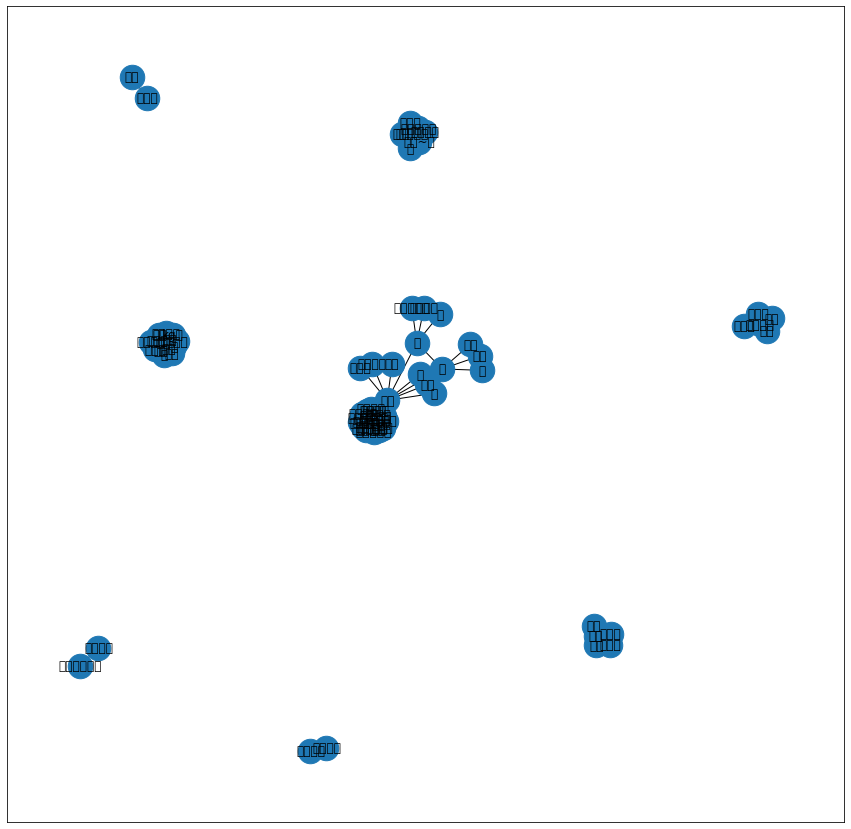

In [26]:
# 텍스트 파일 읽어서 엣지 리스트 그래프 그리기
G = nx.read_edgelist("edge_list.txt", create_using = nx.Graph())

# 그래프를 반복해서 그려보며 불필요한 노드 삭제
# (예시) G.remove_nodes_from(['thanks', 'i', '@', 'pm', 'n', 'sooo', 'truckers', 'caught', 'thousands', 'henry'])
G.remove_nodes_from(['microsofts','topacquisitions'])

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, node_size=600)

(-0.7222909546064994,
 0.8976609633028253,
 -1.0347458879466953,
 1.1933468943297765)

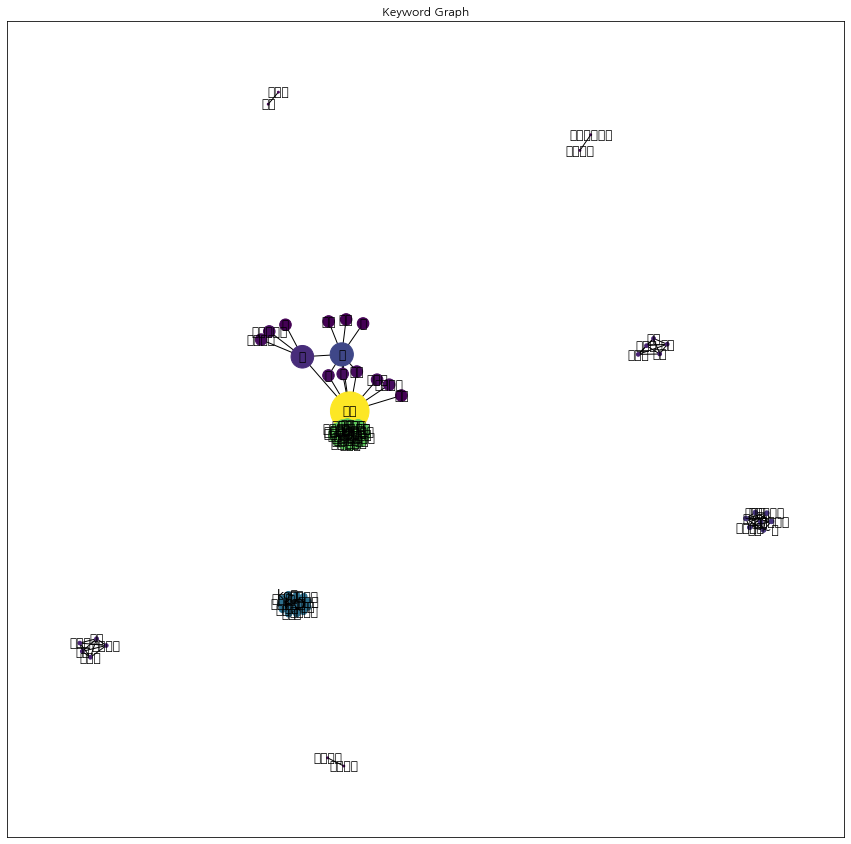

In [27]:
# 그래프는 노드의 위치가 정해져있지 않다.
pos = nx.spring_layout(G) # 노드 그래프를 그려주는 레이아웃을 spring_layout으로 한다
# pos = nx.kamada_kawai_layout(G)
# pos = nx.fruchterman_reingold_layout(G)

# 매개 중심성 계산
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True) # 매개중심성
# 노드 색상 옵션
node_color = [20000.0 * G.degree(v) for v in G] # 연결정도에 따라 노드 색상이 달라지게
# 노드 사이즈 옵션
node_size =  [v * 10000 for v in betCent.values()] # 매개중심성에 따라 노드 크기가 달라지게

plt.figure(figsize=(15, 15)) # 그래프 사이즈
plt.title("Keyword Graph")
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size
                 )

plt.axis('on') # 가장자리 박스 만들기

In [28]:
# 매개 중심성 높은 순서대로 보기

sorted(betCent, key=betCent.get, reverse=True)[:5] # 5개까지

['먹기', '약', '잘', '밥', '전에']

In [29]:
# 노드별로 중심성 보기

# 매개 중심성 (betweenness centrality)
print(nx.betweeness_centrality(G).get(''))    # 그래프에 보이는 노드 바꿔보며 입력해보기

# 연결 중심성 (degree centrality)
print(nx.degree_centrality(G).get(''))         # 그래프에 보이는 노드 바꿔보며 입력해보기

# 근접 중심성 (closeness_centrality)
print(nx.closeness_centrality(G).get(''))      # 그래프에 보이는 노드 바꿔보며 입력해보기


AttributeError: ignored

# 나만의 키워드를 선정하고, 분석 결과 정리하기